In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
data = pd.read_csv('../dataset/cleaned.csv')
data = data.drop(columns = ['id_scaled'])

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'stroke' with your target column name
y = data['stroke']

# Split into training and testing sets (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<class 'pandas.core.series.Series'>


In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

In [5]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [6]:
data

,hypertension,heart_disease,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_scaled,avg_glucose_level_scaled,bmi_scaled,stroke
0,0,1,1,0,1,1,0,1,0,0,1,0,0,0.816895,0.801265,0.301260,1
1,0,0,0,0,1,0,0,0,1,0,0,1,0,0.743652,0.679023,0.203895,1
2,0,1,1,0,1,0,0,1,0,0,0,1,0,0.975586,0.234512,0.254296,1
3,0,0,0,0,1,1,0,1,0,0,0,0,1,0.597168,0.536008,0.276060,1
4,1,0,0,0,1,0,0,0,1,0,0,1,0,0.963379,0.549349,0.156930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,1,0,1,0,0,0,1,0,0.975586,0.132167,0.203895,0
5106,0,0,0,0,1,1,0,0,1,0,0,1,0,0.987793,0.323516,0.340206,0
5107,0,0,0,0,1,0,0,0,1,0,0,1,0,0.426270,0.128658,0.232532,0
5108,0,0,1,0,1,0,0,1,0,0,1,0,0,0.621582,0.513203,0.175258,0


In [7]:
for name, model in models.items():

    if name in ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)    
          
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred ,  zero_division=0))
    metrics["Recall"].append(recall_score(y_test, y_pred ,zero_division=0))
    metrics["F1-Score"].append(f1_score(y_test, y_pred ,zero_division=0))

In [8]:
results_df = pd.DataFrame(metrics)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.952055,1.000000,0.02,0.039216
1,K-Nearest Neighbors,0.951076,0.500000,0.04,0.074074
2,Support Vector Machine,0.951076,0.000000,0.00,0.000000
3,Random Forest,0.948141,0.000000,0.00,0.000000
4,Decision Tree,0.908023,0.133333,0.16,0.145455
5,Naive Bayes,0.190802,0.056000,0.98,0.105946


📊 Best Model: Logistic Regression
📄 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



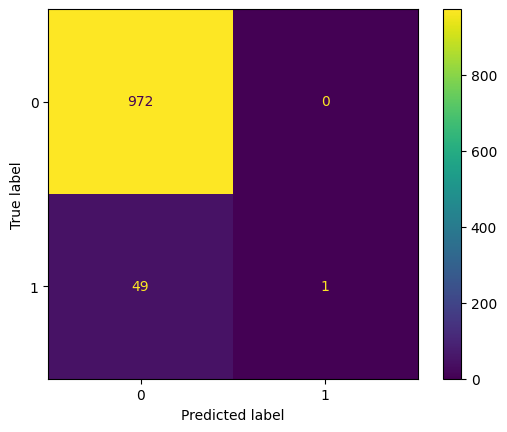

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

if best_model_name in ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine"]:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)
else:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)



cm = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best, zero_division=0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()

# Show results
print(f"📊 Best Model: {best_model_name}")
print("📄 Classification Report:\n")
print(report)